CPU time took: 6.1334
CPU time took: 0.2381
CPU time took: 0.0400
CPU time took: 0.0100
CPU time took: 0.0250
CPU time took: 0.1160
CPU time took: 0.3331
CPU time took: 0.6772
CPU time took: 1.2385
CPU time took: 4.4594
CPU time took: 8.5336
GPU time took: 3.6268
GPU time took: 0.0410
GPU time took: 0.0150
GPU time took: 0.0160
GPU time took: 0.0100
GPU time took: 0.0360
GPU time took: 0.2316
GPU time took: 0.0680
GPU time took: 0.1060
GPU time took: 0.3211
GPU time took: 0.6651


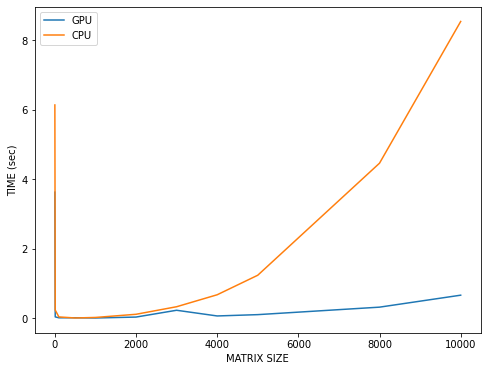

In [1]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt

cpu_times = []
gpu_times = []
sizes = [1, 10, 100, 500, 1000, 2000, 3000, 4000, 5000, 8000, 10000]

for size in sizes:
    start = time.time()
    with tf.device('cpu:0'):
        v1 = tf.Variable(tf.random.normal((size, size)))
        v2 = tf.Variable(tf.random.normal((size, size)))
        op = tf.matmul(v1, v2)

    op.numpy()  # Execute the operation

    cpu_times.append(time.time() - start)
    print('CPU time took: {0:.4f}'.format(time.time() - start))

for size in sizes:
    start = time.time()
    with tf.device('gpu:0'):
        v1 = tf.Variable(tf.random.normal((size, size)))
        v2 = tf.Variable(tf.random.normal((size, size)))
        op = tf.matmul(v1, v2)

    op.numpy()  # Execute the operation

    gpu_times.append(time.time() - start)
    print('GPU time took: {0:.4f}'.format(time.time() - start))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sizes, gpu_times, label='GPU')
ax.plot(sizes, cpu_times, label='CPU')
plt.xlabel('MATRIX SIZE')
plt.ylabel('TIME (sec)')
plt.legend()
plt.show()
